In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.columns.tolist()

['PatientId',
 'AppointmentID',
 'Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'Handcap',
 'SMS_received',
 'No-show']

In [5]:
df.duplicated().sum()

0

In [6]:
df['PatientId'].nunique()

62299

In [7]:
df['PatientId'].duplicated().sum()

48228

In [8]:
df.duplicated(['PatientId', 'No-show']).sum()

38710

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
mask = df.query('Age == -1' )
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
df.drop(index=99832, inplace=True)

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [14]:
df.rename(columns={
    "Hipertension":"Hypertension",
    "No-show":"No_show"
    },inplace=True)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df.drop_duplicates(["PatientId","No_show"], inplace=True)
df.shape

(71816, 14)

In [16]:
df.drop(["PatientId","AppointmentID","ScheduledDay","AppointmentDay"], axis=1, inplace=True)
df.head() 

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
df["Scholarship"].value_counts()

Scholarship
0    64955
1     6861
Name: count, dtype: int64

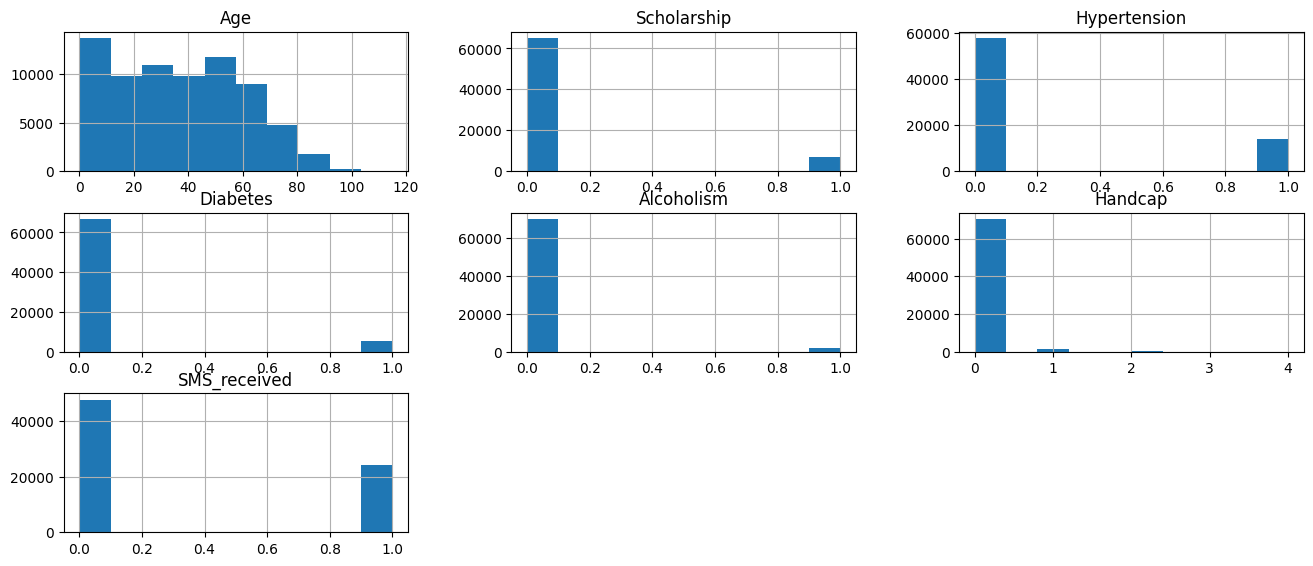

In [18]:
df.hist(figsize=(16,6.5));

In [19]:
show   = df["No_show"] == "No"
noshow = df["No_show"] == "Yes"
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

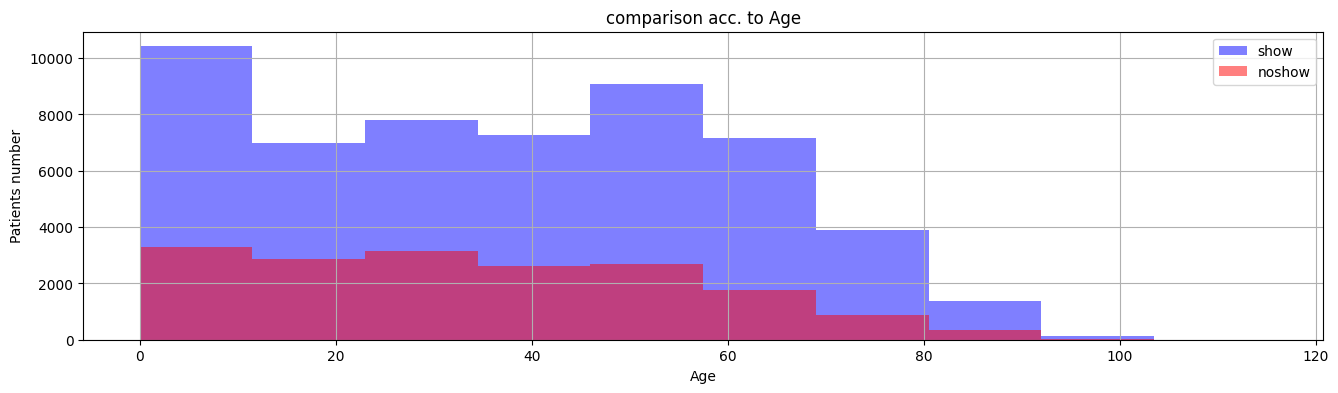

In [20]:
def attendance(df,col_name):
    plt.figure(figsize=[16,4])
    df[col_name][show].hist(alpha=0.5,bins=10,color="blue",label="show")
    df[col_name][noshow].hist(alpha=0.5,bins=10,color="red",label="noshow")
    plt.legend();
    plt.title("comparison acc. to Age")
    plt.xlabel("Age")
    plt.ylabel("Patients number")
    
attendance(df,"Age")

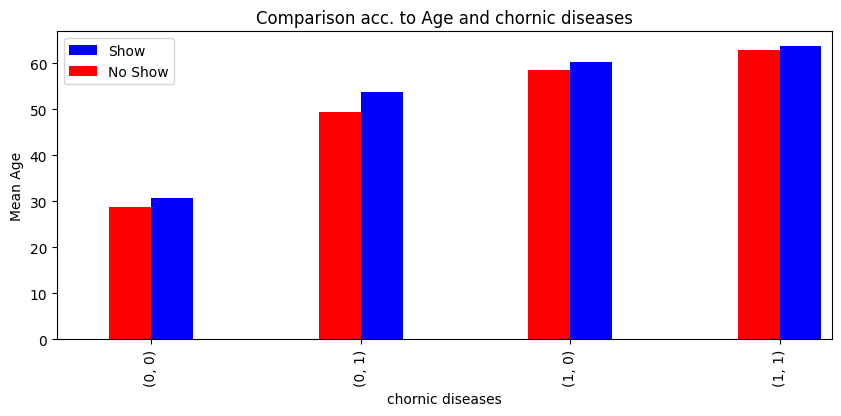

In [21]:
plt.figure(figsize=(10,4))
df[show].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color = 'blue',label = 'Show', position=0 , width=0.2)
df[noshow].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind='bar',color = 'red',label = 'No Show', position=1 , width=0.2)
plt.legend()
plt.title('Comparison acc. to Age and chornic diseases')
plt.xlabel('chornic diseases')
plt.ylabel('Mean Age')
plt.show()

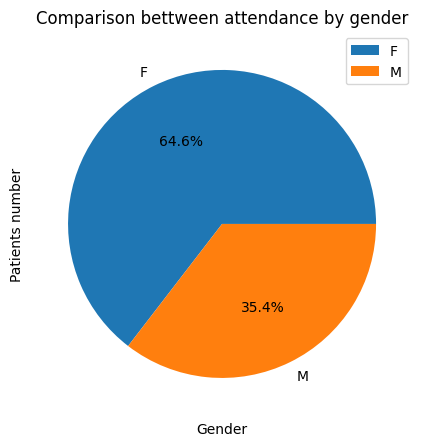

In [22]:
def attendance(df,col_name, x):
    plt.figure(figsize=[16,5])
    df[col_name][x].value_counts().plot(kind="pie",label="show", autopct='%1.1f%%')
    plt.legend()
    plt.title("Comparison bettween attendance by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients number")
    
attendance(df,"Gender", show)

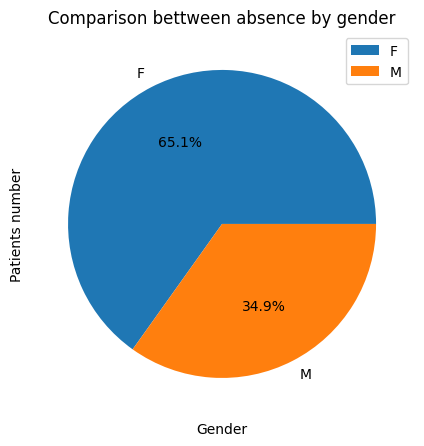

In [23]:
def attendance(df,col_name, x):
    plt.figure(figsize=[16,5])
    df[col_name][x].value_counts().plot(kind="pie",label="No show", autopct='%1.1f%%')
    plt.legend()
    plt.title("Comparison bettween absence by gender")
    plt.xlabel("Gender")
    plt.ylabel("Patients number")
    
attendance(df,"Gender", noshow)

Text(0, 0.5, 'Mean age')

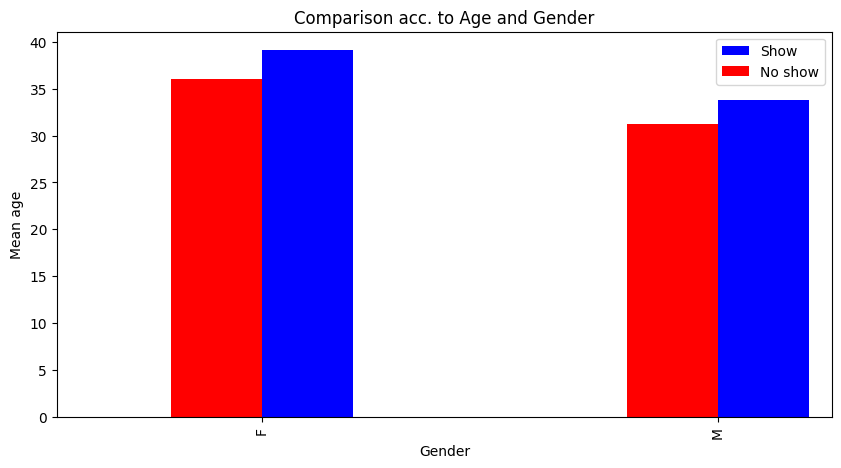

In [24]:
plt.figure(figsize=[10,5])
df[show].groupby('Gender')['Age'].mean().plot(kind='bar', color= 'blue', position=0 , width= 0.2 , label= 'Show')
df[noshow].groupby('Gender')['Age'].mean().plot(kind='bar', color= 'red', position=1 , width= 0.2, label= 'No show')
plt.legend()
plt.title('Comparison acc. to Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Mean age')


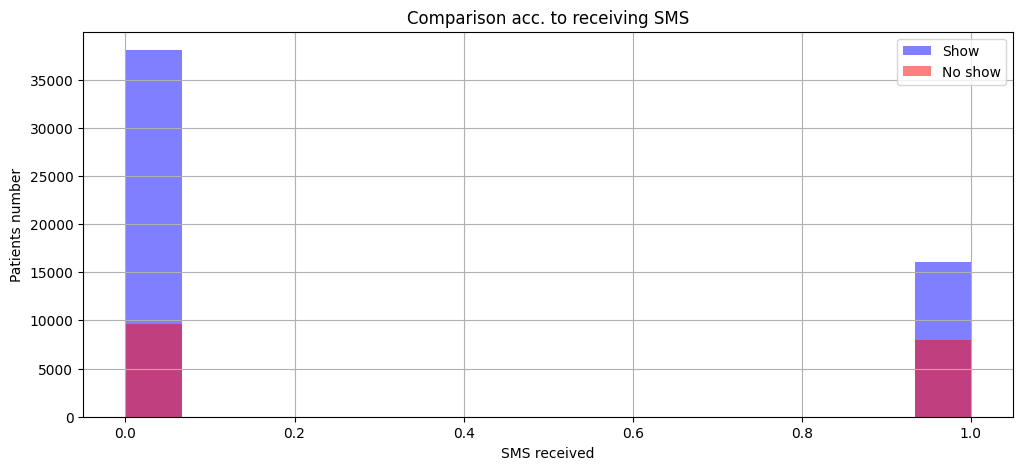

In [25]:
def attendance(df,col_name):
    plt.figure(figsize=[12,5])
    df[col_name][show].hist(alpha= 0.5, bins=15 , color= 'blue', label= 'Show')
    df[col_name][noshow].hist(alpha= 0.5, bins=15 , color= 'red', label= 'No show')
    plt.legend()
    plt.title("Comparison acc. to receiving SMS")
    plt.xlabel("SMS received")
    plt.ylabel("Patients number")
    
attendance(df,"SMS_received")

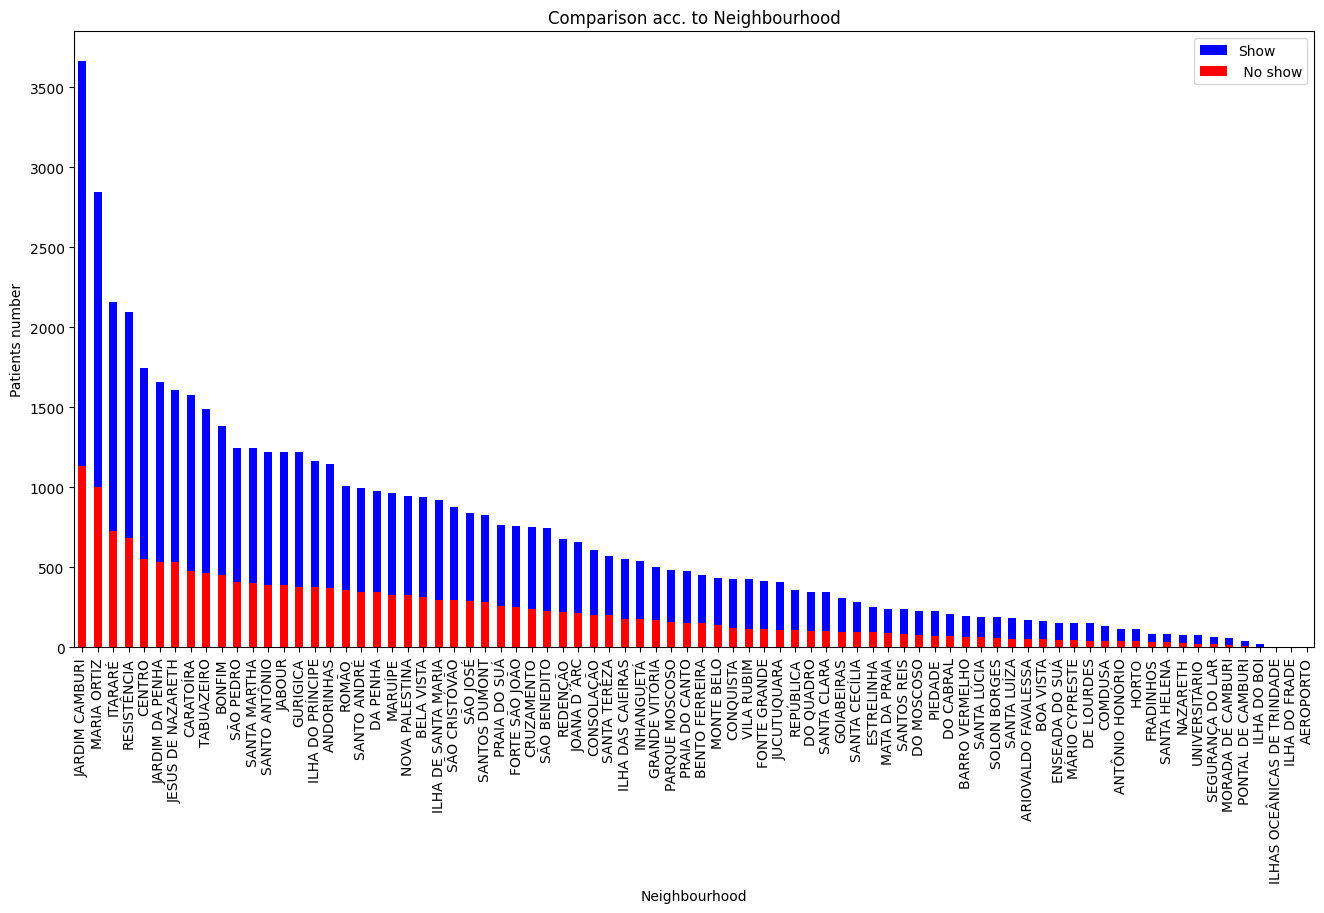

In [26]:
plt.figure(figsize=[16,8])
df['Neighbourhood'][show].value_counts().plot(kind="bar",label="Show", color= 'blue')
df['Neighbourhood'][noshow].value_counts().plot(kind="bar",label=" No show", color= 'red')
plt.legend();
plt.title("Comparison acc. to Neighbourhood")
plt.xlabel("Neighbourhood")
plt.ylabel("Patients number");